In [13]:
##!/apps/anaconda3/bin/python
'''
This is code to generate Figure 3: the mse of two estimators
'''
from matplotlib import pyplot
import scipy.stats as st
import matplotlib.pyplot as plt
import pickle
from scipy.stats import loguniform
import numpy as np
import datetime
from scipy import optimize
import ast
import seaborn as sns
import os
import matplotlib.pyplot as plt
from collections import Counter
import warnings
import csv  
import random as python_random
warnings.filterwarnings("ignore")
import random
import joblib
from scipy.integrate import quad
from sklearn.neighbors import KernelDensity
import datetime
from scipy.optimize import curve_fit

 


def robustness_estimator_grad(Lambda,y,x):
    '''
    x is the input random observations, Lambda is the parameter we want to find, y is the thresohld
    '''
    exp_labmda_x = np.exp([Lambda*_ for _ in x]) 
    grad = y - np.mean(np.multiply(x,exp_labmda_x)) / np.mean(exp_labmda_x) #formula found in A.5.1 Proof of Lemma 
    return (grad)


def stability_measure(data,threshold): #return the stability measure, input is the data we want to compute and the threshold
    x = data  
    lambda_star = optimize.bisect(robustness_estimator_grad,0, 100000,args=(threshold,x), maxiter=100000000,xtol=0.0000001)
    exp_labmda_x = np.exp([lambda_star*_ for _ in x]) 
    stability_measure = lambda_star * threshold - np.log(np.mean(exp_labmda_x)) 
        
    return {'stability_measure':round(stability_measure,5),'mean':round(np.mean(x),5),'std':round(np.std(x),5),'lambda_star':round(lambda_star,14),'threshold':threshold}


def stability_measure_kde(data,threshold): #return the stability measure, input is the data we want to compute and the threshold
    x =  data
    
    kde = KernelDensity(kernel='gaussian', bandwidth = 0.1).fit(data[:, np.newaxis])
   
    integral_left = -10
    integral_right = 10
        
    def robustness_estimator_grad(Lambda,y,x):
        '''
        x is the input random observations, Lambda is the parameter we want to find, y is the thresohld
        '''
        
        
        exp_labmda_x = quad(lambda x: np.exp(Lambda * x)* np.exp(kde.score_samples([[x]])[0]),integral_left, integral_right)[0] 
        x_exp_labmda_x = quad(lambda x: x * np.exp(Lambda * x)* np.exp(kde.score_samples([[x]])[0]), integral_left, integral_right)[0] 
        
        grad = y - x_exp_labmda_x/exp_labmda_x #formula found in A.5.1 Proof of Lemma 
        return (grad)
    
    lambda_star = optimize.bisect(robustness_estimator_grad,0, 6,args=(threshold,x), maxiter=100000000,xtol=0.0001)
    #exp_labmda_x = np.exp([lambda_star*_ for _ in x]) 
    
    exp_labmda_x = quad(lambda x: np.exp(lambda_star * x)* np.exp(kde.score_samples([[x]])[0]),integral_left, integral_right)[0] 
    
    stability_measure = lambda_star * threshold - np.log(exp_labmda_x) 
        
    return {'stability_measure':round(stability_measure,5),'mean':round(np.mean(x),5),'std':round(np.std(x),5),'lambda_star':round(lambda_star,14),'threshold':threshold}



def set_seed(seed): 
    np.random.seed(seed)
    import random as python_random
    python_random.seed(seed)

## The estimator using KDE

In [ ]:
mean_list = {}
std_list = {}

set_seed(1234)


sigma_list = [0.9,1,1.1]
y_list = [1.6,1.8,2,2.2,2.4]

mean_list['sigma'] = {}
std_list['sigma'] = {}
mean_list['y'] = {}
std_list['y'] = {}

for sigma in sigma_list:
    mean_list['sigma'][sigma] = []
    std_list['sigma'][sigma] = []


    
    
def true_I(sigma,y):
    ans = y*sigma - 1 -np.log(y*sigma)
    return ans

n_samples_list = list(np.arange(1000, 50000+10000, 2000)) 

#n_samples_list =  [100,500,1000]

Sub_list = [0,1,2,5,8,9,15,20]

n_samples_list = list(np.array(n_samples_list)[Sub_list])

#n_samples_list = [100]

n = len(n_samples_list)

N_rep = 40

for sigma in sigma_list:
    y = 2
    for i,n_samples in enumerate(n_samples_list): 
        stability_val_list =  [stability_measure_kde(_,y)['stability_measure'] for _ in data['sigma'][sigma][i]]
        mean_list['sigma'][sigma].append(np.mean(stability_val_list))
        std_list['sigma'][sigma].append(np.std(stability_val_list))
        
        print('mean', np.mean(stability_val_list))
        print('std', np.std(stability_val_list))
        

        
joblib.dump(std_list, "/user/ym2865/Result/std_list_simulation_kde_new.pkl") 
joblib.dump(mean_list, "/user/ym2865/Result/mean_list_simulation_kde_new.pkl") 

mean 0.2247335
std 0.028707226141687737
mean 0.21975699999999998
std 0.017195150653599986
mean 0.22369049999999996
std 0.013433478505212265
mean 0.21769075
std 0.0148692638330719
mean 0.21739575000000003
std 0.008645981114801258
mean 0.22020725
std 0.010224148616755333
mean 0.2185445
std 0.007452646828476442
mean 0.21952975000000002
std 0.008870088919368286
mean 0.31253775
std 0.04357081898974932
mean 0.313672
std 0.02091647271888834
mean 0.31142675
std 0.02062062782597805
mean 0.314367
std 0.012155977994386134
mean 0.315795
std 0.014157388353788982
mean 0.3146
std 0.014258967178586249


# prepare data from Figure 3

In [ ]:
mean_list = {}
std_list = {}

set_seed(1234)
N_rep = 40


sigma_list = [0.9,1,1.1]
y_list = [1.6,1.8,2,2.2,2.4]

mean_list['sigma'] = {}
std_list['sigma'] = {}
mean_list['y'] = {}
std_list['y'] = {}

for sigma in sigma_list:
    mean_list['sigma'][sigma] = []
    std_list['sigma'][sigma] = []

    
    
def true_I(sigma,y):
    ans = y*sigma - 1 -np.log(y*sigma)
    return ans

n_samples_list = list(np.arange(1000, 50000+10000, 2000)) 
n = len(n_samples_list)

for sigma in sigma_list:
    y = 2
    for n_samples in n_samples_list:
        stability_val_list = [stability_measure(np.random.exponential(scale = 1/sigma, size = n_samples),y)['stability_measure'] for _ in range(N_rep)]
        mean_list['sigma'][sigma].append(np.mean(stability_val_list))
        std_list['sigma'][sigma].append(np.std(stability_val_list))
        
        
joblib.dump(std_list, "/user/ym2865/Result/std_list_simulation.pkl") 
joblib.dump(mean_list, "/user/ym2865/Result/mean_list_simulation.pkl") 

# Figure 3, MSE Plot

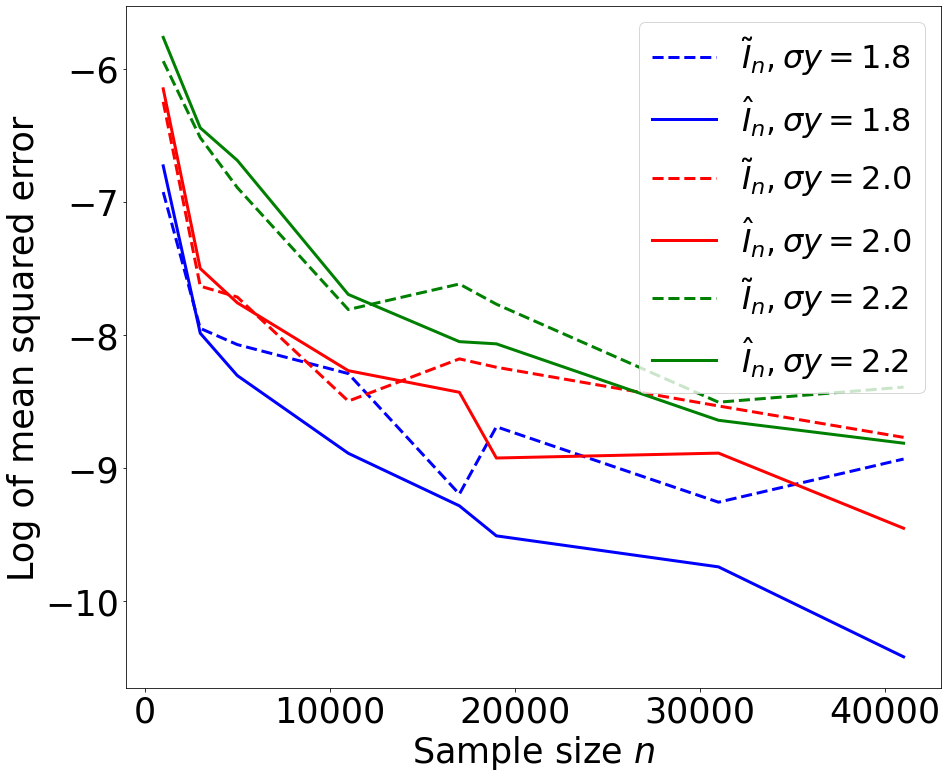

In [2]:
std_list_org = joblib.load("/user/ym2865/Result/std_list_simulation.pkl") 
mean_list_org = joblib.load("/user/ym2865/Result/mean_list_simulation.pkl")  

std_list_kde = joblib.load("/user/ym2865/Result/std_list_simulation_kde_new.pkl") 
mean_list_kde = joblib.load("/user/ym2865/Result/mean_list_simulation_kde_new.pkl") 

import cycler


def f(a,b): return a # [a[i] for i in b]

n_samples_list = list(np.arange(1000, 50000+10000, 2000)) 
n = len(n_samples_list)



sigma_list = [0.9,1.0,1.1]
y_list = [1.6,1.8,2,2.2,2.4]


def generate_mse(mean_list,std_list):

    mse_list = {}
    mse_list['sigma'] = {} 

    def true_I(sigma,y):
        ans = y*sigma - 1 -np.log(y*sigma)
        return ans

    for sigma in sigma_list:
        sig_temp = std_list['sigma'][sigma]
        bias_temp = mean_list['sigma'][sigma] - true_I(sigma , 2)

        mse_list['sigma'][sigma] = np.power(sig_temp,2) + np.power(bias_temp,2)
    
    return mse_list


mse_list_org = generate_mse(mean_list_org,std_list_org)
mse_list_kde = generate_mse(mean_list_kde,std_list_kde)

    
plt.figure(figsize=(12,10)) 



linestyle_list = ['bo:','ro-','go-.',':','-'] 
linestyle_list = ['o:','-','-.',':','-'] 
colors_list = ['b','r','g','c','m','y','k']

line_width = 3

sigma_list_2 = [0.9,1,1.1]
 
    
Sub_list = [0,1,2,5,8,9,15,20]

    
    
def f(a,b): return [a[i] for i in b]

    
for i, sigma in enumerate(sigma_list_2):    
    plt.plot(f(n_samples_list,Sub_list),np.log(np.array(mse_list_kde['sigma'][sigma])),'--',
             label = r'$\tilde{I}_n, \sigma y = $'+ str(round(float(sigma*2),2)) ,linewidth = line_width, color = colors_list[i]) 
    #print(np.log(np.array(mse_list_org['sigma'][sigma])[Sub_list]))
    plt.plot(f(n_samples_list,Sub_list),np.log(np.array(mse_list_org['sigma'][sigma])[Sub_list]),'-',
         label = '$\hat{I}_n, \sigma y = $'+ str(round(float(sigma*2),2)) ,linewidth = line_width, color = colors_list[i]) 

    
    
fig_size = 35

plt.legend() 
plt.tight_layout()   
plt.xlabel('Sample size $n$', fontsize=fig_size)
plt.ylabel('Log of mean squared error', fontsize=fig_size)
plt.legend(prop={'size': fig_size-3},loc='upper right')
 
plt.tick_params(axis='x', labelsize=fig_size)
#plt.xticks([1000,10000,20000,30000,40000],['$10^3$','$10^4$','$2*10^4$','$3*10^4$','$4*10^4$'])
plt.tick_params(axis='y', labelsize=fig_size)

plt.savefig('/user/ym2865/Result/model_data/simulation_stability_sigma_kde_new.pdf',format='pdf',dpi=1200,bbox_inches='tight')
plt.show()


 

# Fgure 2

In [ ]:
std_list = joblib.load("/user/ym2865/Result/std_list_simulation.pkl") 
mean_list = joblib.load("/user/ym2865/Result/mean_list_simulation.pkl") 


n_samples_list = list(np.arange(1000, 50000+10000, 2000)) 
n = len(n_samples_list)

def f(a,b): return [a[i] for i in b]





sigma_list = [0.9,1.0,1.1]
y_list = [1.6,1.8,2,2.2,2.4]
mse_list = {}
mse_list['sigma'] = {} 

def true_I(sigma,y):
    ans = y*sigma - 1 -np.log(y*sigma)
    return ans

for sigma in sigma_list:
    sig_temp = std_list['sigma'][sigma]
    bias_temp = mean_list['sigma'][sigma] - true_I(sigma , 2)
    
    mse_list['sigma'][sigma] = np.power(sig_temp,2) + np.power(bias_temp,2)

    
    
plt.figure(figsize=(12,10)) 



linestyle_list = ['bo:','ro-','go-.',':','-'] 
line_width = 3

sigma_list_2 = [0.9,1,1.1]
 
    
Sub_list = [0,1,2,5,8,9,15,20]
    
for i, sigma in enumerate(sigma_list_2):  
    print(np.log(f(mse_list['sigma'][sigma],Sub_list)))
    plt.plot(f(n_samples_list,Sub_list),np.log(f(mse_list['sigma'][sigma],Sub_list)),linestyle_list[i] ,
             label = '$\sigma y = $'+ str(round(float(sigma*2),2)) ,linewidth = line_width) 
 #'$\sigma$ =' + str(sigma) + ', $y$ = 2, 
    
fig_size = 35

plt.legend() 
plt.tight_layout()   
plt.xlabel('Sample size $n$', fontsize=fig_size)
plt.ylabel('Log of mean squared error', fontsize=fig_size)
plt.legend(prop={'size': fig_size-3},loc='upper right')
 
plt.tick_params(axis='x', labelsize=fig_size)
plt.xticks([1000,10000,20000,30000,40000],['$10^3$','$10^4$','$2*10^4$','$3*10^4$','$4*10^4$'])
plt.tick_params(axis='y', labelsize=fig_size)

plt.show()